In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import gmaps
from pandas import DataFrame
from scipy.stats import linregress


In [77]:
# File to Load (Remember to Change These)
file_to_load = "Resources/database.csv"

# Read File and store into Pandas data frame
Birds_data = pd.read_csv(file_to_load)
Birds_data

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,...,1,0,0,0,0,0,0,0,0,0


In [78]:
Birds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

In [79]:
Birds_data1=DataFrame (Birds_data["Visibility"],columns=['Visibility'])
Birds_data2=DataFrame (Birds_data["Precipitation"],columns=['Precipitation'])
Birds_data3=DataFrame (Birds_data["Injuries"],columns=['Injuries'])
Birds_data4=DataFrame (Birds_data["Fatalities"],columns=['Fatalities'])
frames = [Birds_data1, Birds_data2, Birds_data3, Birds_data4]
Birds_data5 = pd.concat(frames)
Birds_data5.to_csv("Visibility vs Precipitation.csv", encoding="utf-8", index=False)
Birds_data5


,Visibility,Precipitation,Injuries,Fatalities
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,DAY,NaN,NaN,NaN
4,DAY,NaN,NaN,NaN
...,...,...,...,...
174099,NaN,NaN,NaN,NaN
174100,NaN,NaN,NaN,NaN
174101,NaN,NaN,NaN,NaN
174102,NaN,NaN,NaN,NaN


In [80]:
# get the unique values in Visibility
Birds_data["Visibility"].unique()

array([nan, 'DAY', 'NIGHT', 'DUSK', 'DAWN', 'UNKNOWN'], dtype=object)

In [81]:
# get the total number of unique values in Visibility
Birds_data["Visibility"].value_counts()

DAY        68565
NIGHT      32862
DUSK        4965
DAWN        3515
UNKNOWN       26
Name: Visibility, dtype: int64

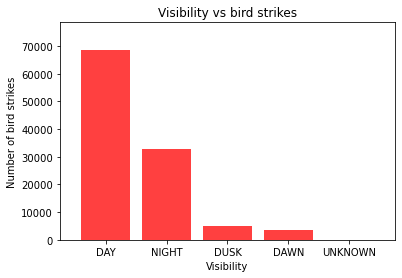

In [82]:
# DATA SET 1 for bird strikes due to Visibility
Visibility = ['DAY', 'NIGHT', 'DUSK', 'DAWN', 'UNKNOWN']
bird_strikes = Birds_data["Visibility"].value_counts()

x_axis = np.arange(0, len(Visibility))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Visibility vs bird strikes")
plt.xlabel("Visibility")
plt.ylabel("Number of bird strikes")

plt.xlim(-0.75, len(Visibility)-.25)
plt.ylim(0, max(bird_strikes) + 10000)

plt.bar(x_axis, bird_strikes, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, Visibility)
plt.show()

## Based on this bar chart. we can see most of the bird strikes happening under the "Day" weather condition.So I think Visibility
## will not be the strongest evidence that will result the bird strikes happening.However,there are many bird strikes happening
## at night so Visibility could be one of the factors that result bird strikes happening.

In [83]:
# get the unique values in Precipitation
Birds_data["Precipitation"].unique()

array([nan, 'NONE', 'FOG', 'RAIN', 'SNOW', 'FOG, RAIN', 'RAIN, SNOW',
       'FOG, SNOW', 'FOG, RAIN, SNOW'], dtype=object)

In [84]:
# get the total number of unique values in Precipitation
Birds_data["Precipitation"].value_counts()
# None=Clear weather

NONE               80512
RAIN                5270
FOG                 1952
SNOW                 313
FOG, RAIN            239
RAIN, SNOW            19
FOG, SNOW             12
FOG, RAIN, SNOW        5
Name: Precipitation, dtype: int64

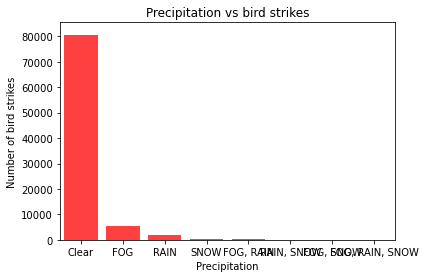

In [85]:
# DATA SET 1 for bird strikes due to Precipitation
Precipitation = ['Clear', 'FOG', 'RAIN', 'SNOW', 'FOG, RAIN', 'RAIN, SNOW',
       'FOG, SNOW', 'FOG, RAIN, SNOW']
bird_strikes1 = Birds_data["Precipitation"].value_counts()

x_axis = np.arange(0, len(Precipitation))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Precipitation vs bird strikes")
plt.xlabel("Precipitation")
plt.ylabel("Number of bird strikes")

plt.xlim(-0.5, len(Precipitation)-0.5)
plt.ylim(0, max(bird_strikes1) + 5000)

plt.bar(x_axis, bird_strikes1, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, Precipitation)
plt.show()

## Based on this bar chart. we can see most of the bird strikes happening under the "clear" weather condition.So I think Precipitation
## probably will not be the main factors that result bird strikes happening.

In [86]:
# get the unique values in Injuries
Birds_data["Injuries"].unique()

array([ nan,   1.,   2.,   7.,   5.,   4.,   3., 100.])

In [87]:
# get the total number of unique values in Injuries
Birds_data["Injuries"].value_counts()

1.0      178
2.0       42
5.0        2
7.0        2
4.0        2
3.0        2
100.0      1
Name: Injuries, dtype: int64

In [88]:
# get the unique values in Fatalities
Birds_data["Fatalities"].unique()

array([nan,  1.,  2.,  0.,  5.,  8.])

In [89]:
# get the total number of unique values in Fatalities
Birds_data["Fatalities"].value_counts()

0.0    553
1.0      7
2.0      3
8.0      1
5.0      1
Name: Fatalities, dtype: int64

In [90]:
#(Precipitation = None)
Birds_data["Precipitation"].value_counts()
# None=Clear weather=80512
A=80512

In [91]:
#(Visibility = dawn+day)
# get the total number of unique values in Visibility
Birds_data["Visibility"].value_counts()
## dawn+day=68565+3515=72080
B=72080

In [92]:
# Hypothesis 1: More injuries+fatalities happen in fair weather (Precipitation = None)
# Hypothesis 2: More injuries+fatalities happen during the day (Visibility = dawn+day)
A=80512 #(Precipitation = None)
AA=5270+1952+313+239+19+12+5  #=7810 #Precipitation /= None
B=72080 #(Visibility = dawn+day)
BB=32862+4965+26  #=37853  #(Visibility /= dawn+day)

# DATA SET1
Precipitation1 = ["Clear", "Not Clear"] ## Not clear =FOG, RAIN, SNOW 
members = [A,AA]
colors = ["yellowgreen", "red"]
explode = (0, 0.1)


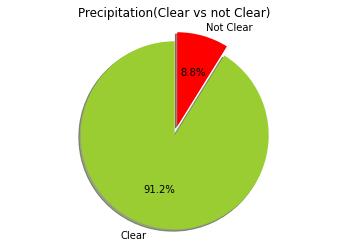

In [93]:
plt.title("Precipitation(Clear vs not Clear)")
plt.pie(members, explode=explode, labels=Precipitation1, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [94]:
# DATA SET2
gyms = ["dawn+day", "not dawn+day"]
members = [B,BB]
colors = ["lightcoral", "lightskyblue"]
explode = (0, 0.1)


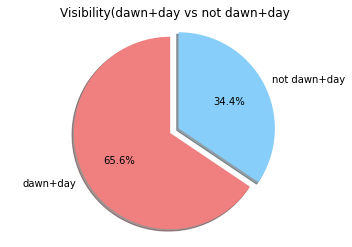

In [95]:
plt.title("Visibility(dawn+day vs not dawn+day")
plt.pie(members, explode=explode, labels=gyms, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [96]:
## Concludsions:
## 1.There are more injuries+fatalities happen in fair weather (Precipitation = None) and during the day (Visibility = dawn+day).

## 2.Based on the first bar chart. we can see most of the bird strikes happening under the "Day" weather condition.So I think Visibility
## will not be the strongest evidence that will result the bird strikes happening.However,there are many bird strikes happening
## at night so Visibility could be one of the factors that result bird strikes happening.

## 3.Based on the second bar chart. we can see most of the bird strikes happening under the "clear" weather condition.So I think Precipitation
## probably will not be the main factors that result bird strikes happening.